# Task 4: Baseline Conditional GAN Training (No Attention)
Train a simple fully-connected conditional GAN on MNIST (baseline for Task 5).

## 1. Setup

In [1]:
%pip install -q torch torchvision

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Imports & Config

In [2]:
import torch, os, matplotlib.pyplot as plt
from torchvision import datasets, transforms, utils
from torch import nn
from pathlib import Path

import sys
sys.path.append('./task4')  # Add the local task4 folder to sys.path

from gans import Generator, Discriminator, LATENT_DIM, N_CLASSES, weights_init_normal
DEVICE=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
OUT='task4_outputs'; Path(OUT).mkdir(exist_ok=True)

KeyboardInterrupt: 

## 3. Data

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5],[0.5])])
ds = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader = torch.utils.data.DataLoader(ds, batch_size=64, shuffle=True, num_workers=2)

## 4. Models

In [ ]:
G=Generator().to(DEVICE); D=Discriminator().to(DEVICE)
G.apply(weights_init_normal); D.apply(weights_init_normal)
criterion=nn.BCELoss()
opt_G=torch.optim.Adam(G.parameters(), lr=2e-4, betas=(0.5,0.999))
opt_D=torch.optim.Adam(D.parameters(), lr=2e-4, betas=(0.5,0.999))
hist={'g':[],'d':[]}

## 5. Train

In [ ]:
EPOCHS=10
for epoch in range(1,EPOCHS+1):
    for imgs, labels in loader:
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        b=imgs.size(0)
        valid=torch.ones(b,1,device=DEVICE); fake=torch.zeros(b,1,device=DEVICE)
        # D
        opt_D.zero_grad()
        z=torch.randn(b, LATENT_DIM, device=DEVICE)
        gen=G(z, labels)
        loss_real=criterion(D(imgs, labels), valid)
        loss_fake=criterion(D(gen.detach(), labels), fake)
        d_loss=(loss_real+loss_fake)/2; d_loss.backward(); opt_D.step()
        # G
        opt_G.zero_grad()
        g_loss=criterion(D(gen, labels), valid); g_loss.backward(); opt_G.step()
    hist['g'].append(g_loss.item()); hist['d'].append(d_loss.item())
    with torch.no_grad():
        z=torch.randn(25, LATENT_DIM, device=DEVICE)
        lab=torch.arange(25, device=DEVICE)%N_CLASSES
        samp=G(z, lab)*0.5+0.5
        utils.save_image(samp, f'{OUT}/epoch_{epoch}.png', nrow=5)
    print(f'Epoch {epoch}/{EPOCHS} D {d_loss.item():.4f} G {g_loss.item():.4f}')
torch.save(G.state_dict(), f'{OUT}/generator.pt')
torch.save(D.state_dict(), f'{OUT}/discriminator.pt')

Epoch 1/10 D 0.4886 G 1.5187
Epoch 2/10 D 0.5439 G 1.4226
Epoch 2/10 D 0.5439 G 1.4226
Epoch 3/10 D 0.6022 G 0.7238
Epoch 3/10 D 0.6022 G 0.7238
Epoch 4/10 D 0.6299 G 0.9519
Epoch 4/10 D 0.6299 G 0.9519
Epoch 5/10 D 0.6040 G 0.9669
Epoch 5/10 D 0.6040 G 0.9669
Epoch 6/10 D 0.6379 G 0.9972
Epoch 6/10 D 0.6379 G 0.9972
Epoch 7/10 D 0.6679 G 0.8034
Epoch 7/10 D 0.6679 G 0.8034
Epoch 8/10 D 0.6754 G 0.8317
Epoch 8/10 D 0.6754 G 0.8317
Epoch 9/10 D 0.6393 G 0.8901
Epoch 9/10 D 0.6393 G 0.8901
Epoch 10/10 D 0.6316 G 0.9076
Epoch 10/10 D 0.6316 G 0.9076


## 6. Loss Curves

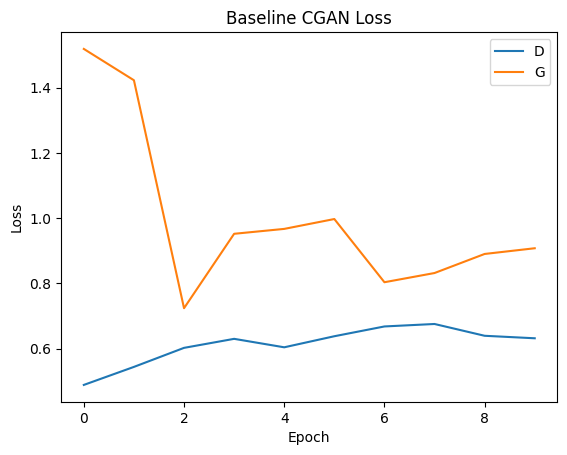

In [ ]:
plt.plot(hist['d'], label='D'); plt.plot(hist['g'], label='G'); plt.legend(); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Baseline CGAN Loss'); plt.savefig(f'{OUT}/loss.png'); plt.show()

## 7. Summary
Baseline (non-attention) training complete. Outputs saved to task4_outputs.